In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

### import files using pandas

In [61]:
Train_Data = pd.read_csv(r'C:\Users\kaustubh\anaconda 66\machine learnig\Hackathon07-02-20\sample_train.csv')
Train_Data.head(1)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1


In [62]:
Train_Data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [63]:
Train_Data.drop(labels='key',axis=1,inplace=True)

In [64]:
Train_Data.shape

(200000, 7)

In [65]:
test = pd.read_csv(r'C:\Users\kaustubh\anaconda 66\machine learnig\Hackathon07-02-20\sample_test.csv')
test.head(1)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.79071,-73.94757,40.75622,1


In [67]:
test.shape,Train_Data.shape

((50000, 6), (200000, 7))

In [68]:
Train_Data.head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1


In [69]:
test.head(1)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-02-10 19:06:00 UTC,-73.951662,40.79071,-73.94757,40.75622,1


# understand dataset and drop unwanted variables

In [70]:
print(Train_Data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
pickup_datetime      50000 non-null object
pickup_longitude     50000 non-null float64
pickup_latitude      50000 non-null float64
dropoff_longitude    50000 non-null float64
dropoff_latitude     50000 non-null float64
passenger_count      50000 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.3+ MB
None


In [71]:
Train_Data["pickup_datetime"] = pd.to_datetime(Train_Data["pickup_datetime"])

In [72]:
print(Train_Data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null datetime64[ns, UTC]
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB
None


In [73]:
Train_Data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### missing values

In [74]:
Train_Data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [75]:
Train_Data.dropna(axis=0,inplace = True)

In [76]:
Train_Data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

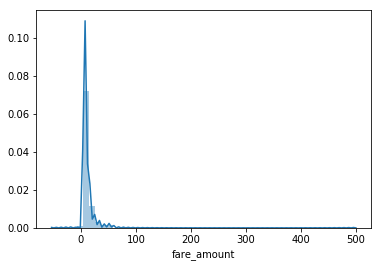

In [18]:
sns.distplot(Train_Data["fare_amount"])

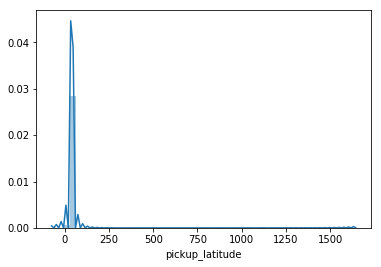

In [77]:
sns.distplot(Train_Data["pickup_latitude"])

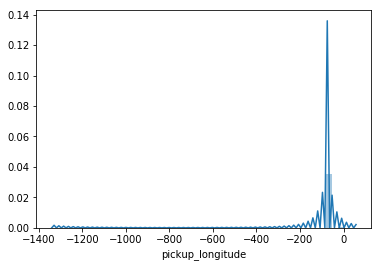

In [78]:
sns.distplot(Train_Data["pickup_longitude"])


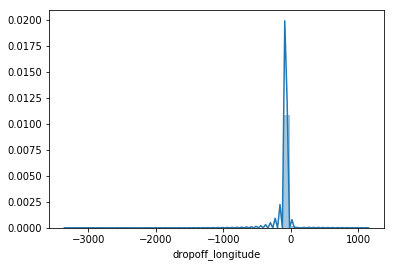

In [79]:
sns.distplot(Train_Data['dropoff_longitude'])

In [81]:
print("drop_off latitude min value",Train_Data["dropoff_latitude"].min())
print("drop_off latitude max value",Train_Data["dropoff_latitude"].max())
print("drop_off longitude min value", Train_Data["dropoff_longitude"].min())
print("drop_off longitude max value",Train_Data["dropoff_longitude"].max())
print("pickup latitude min value",Train_Data["pickup_latitude"].min())
print("pickup latitude max value",Train_Data["pickup_latitude"].max())
print("pickup longitude min value",Train_Data["pickup_longitude"].min())
print("pickup longitude max value",Train_Data["pickup_longitude"].max())

drop_off latitude min value -881.9855130000002
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999996
pickup latitude min value -74.01551500000002
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


In [82]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value -74.00110699999998
drop_off latitude max value 47.433332
drop_off longitude min value -1491.194073
drop_off longitude max value 40.796262
pickup latitude min value -74.001047
pickup latitude max value 42.46842
pickup longitude min value -80.734728
pickup longitude max value 40.812005


In [83]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=41.709555

In [87]:
tempdf=Train_Data[(Train_Data["dropoff_latitude"]<min_latitude) | 
                (Train_Data["pickup_latitude"]<min_latitude) |
                (Train_Data["dropoff_longitude"]<min_longitude) | 
                (Train_Data["pickup_longitude"]<min_longitude) |
                (Train_Data["dropoff_latitude"]>max_latitude) | 
                (Train_Data["pickup_latitude"]>max_latitude) | 
                (Train_Data["dropoff_longitude"]>max_longitude) | 
                (Train_Data["pickup_longitude"]>max_longitude) ]
print("before droping",Train_Data.shape)
Train_Data.drop(tempdf.index,inplace=True)
print("after droping",Train_Data.shape)

before droping (199999, 7)
after droping (199961, 7)


In [88]:
import calendar
Train_Data['day']=Train_Data['pickup_datetime'].apply(lambda x:x.day)
Train_Data['hour']=Train_Data['pickup_datetime'].apply(lambda x:x.hour)
Train_Data['month']=Train_Data['pickup_datetime'].apply(lambda x:x.month)
Train_Data['year']=Train_Data['pickup_datetime'].apply(lambda x:x.year)
Train_Data['weekday']=Train_Data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [90]:
Train_Data.weekday = Train_Data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [93]:
Train_Data.drop(labels = 'pickup_datetime',axis=1,inplace=True)

In [94]:
Train_Data.head(1)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199961 entries, 0 to 199999
Data columns (total 11 columns):
fare_amount          199961 non-null float64
pickup_longitude     199961 non-null float64
pickup_latitude      199961 non-null float64
dropoff_longitude    199961 non-null float64
dropoff_latitude     199961 non-null float64
passenger_count      199961 non-null int64
day                  199961 non-null int64
hour                 199961 non-null int64
month                199961 non-null int64
year                 199961 non-null int64
weekday              199961 non-null int64
dtypes: float64(5), int64(6)
memory usage: 23.3 MB


# model  building

In [95]:
from sklearn.model_selection import train_test_split

In [101]:
x=Train_Data.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
5,-73.969019,40.755910,-73.969019,40.755910,1,12,2,2,2011,6
6,-73.961447,40.693965,-73.871195,40.774297,5,12,7,10,2014,0
7,0.000000,0.000000,0.000000,0.000000,1,11,13,12,2012,2
8,-73.975187,40.745767,-74.002720,40.743537,1,17,9,2,2012,5
9,-74.001065,40.741787,-73.963040,40.775012,1,29,19,3,2012,4


In [100]:
y=Train_Data["fare_amount"]


In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [103]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
36449,-73.963597,40.761797,-73.970199,40.762533,1,4,22,9,2014,4
177679,-74.013143,40.705700,-73.867012,40.768862,4,2,17,1,2013,3
36877,-73.993683,40.702455,-73.917713,40.684747,2,31,3,10,2010,0
20428,-73.954686,40.780613,-73.971005,40.758253,1,29,10,8,2012,3
18927,-73.978887,40.777162,-73.993860,40.746392,1,14,16,7,2013,0


In [104]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
35707,-73.979422,40.743943,-73.969162,40.758608,1,26,16,6,2012,2
37333,-74.000873,40.747298,-73.991410,40.764548,2,14,17,4,2011,4
131999,-74.007640,40.732222,-73.988398,40.748832,5,29,8,11,2010,1
106818,-73.960133,40.719825,-73.942702,40.717567,4,6,21,9,2013,5
52881,-73.995711,40.764551,-73.991177,40.750312,2,1,8,5,2009,5


In [41]:
y_train.head()

80768     19.7
111783     7.7
24615      4.5
46932      4.5
86655     10.0
Name: fare_amount, dtype: float64

In [105]:
y_test.head()

35707     7.3
37333     6.5
131999    8.1
106818    8.5
52881     9.7
Name: fare_amount, dtype: float64

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(159968, 10)
(39993, 10)
(39993,)
(159968,)


# linear regreesion

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
predictedvalues = lrmodel.predict(x_test)

In [124]:
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 10.059636097688832


In [116]:
from sklearn.metrics import mean_squared_error

# random forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [114]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [117]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.832765425253074


In [126]:
rfrmodel_pred.shape

(39993,)

# working on test data

In [128]:
test = pd.read_csv(r'C:\Users\kaustubh\anaconda 66\machine learnig\Hackathon07-02-20\sample_test.csv')


In [129]:
test.drop(test[['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key']],axis=1,inplace=True)

In [130]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [139]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [140]:
test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [146]:
test.head(2)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.951662,40.790710,-73.947570,40.756220,1,10,19,2,2011,4
1,-73.951007,40.771508,-73.974075,40.763553,1,23,9,6,2011,4


In [143]:
test.drop(['pickup_datetime'], axis = 1, inplace = True)

In [145]:
test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [151]:
rfrmodel_pred= rfrmodel.predict(test)

In [158]:
df = pd.DataFrame(rfrmodel_pred)
df

,0
0,11.3910
1,9.1070
2,5.9070
3,11.6560
4,11.7360
5,4.8800
6,8.2100
7,9.3400
8,6.1000
9,7.2150


In [163]:
df.to_csv('pred.csv')